In [2]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py  
import plotly.graph_objs as go
%matplotlib inline

In [3]:
start =datetime.datetime(2019,1,1)
end =datetime.datetime(2022,6,1)
HSBC=data.DataReader("HSBC",'yahoo',start,end)
MS=data.DataReader("MS",'yahoo',start,end)
GS=data.DataReader("GS",'yahoo',start,end)
JPM=data.DataReader("JPM",'yahoo',start,end)

In [4]:
BCS=data.DataReader("BCS",'yahoo',start,end)

In [5]:
tickers=['HSBC','MS','GS','JPM']

In [6]:
bank_stocks=pd.concat([ HSBC,MS,GS,JPM] ,axis=1,keys=tickers)

In [7]:
bank_stocks.head()

HSBC                                                         \
                 High        Low       Open      Close     Volume  Adj Close   
Date                                                                           
2018-12-31  41.410000  40.849998  41.169998  41.110001  1719900.0  35.030750   
2019-01-02  40.910000  40.250000  40.369999  40.880001  2565000.0  34.834759   
2019-01-03  40.770000  40.290001  40.529999  40.430000  1479400.0  34.451305   
2019-01-04  41.849998  41.259998  41.330002  41.610001  3060900.0  35.456810   
2019-01-07  41.259998  40.860001  41.040001  41.049999  2212300.0  34.979618   

                   MS                                   ...          GS  \
                 High        Low       Open      Close  ...        Open   
Date                                                    ...               
2018-12-31  40.080002  39.070000  39.669998  39.650002  ...  163.779999   
2019-01-02  40.720001  38.759998  39.020000  40.400002  ...  164.330002   
2019-01-03  40.220001  39.250000  40.220001  39.680000  ...  170.660004   
2019-01-04  41.580002  40.279999  40.500000  41.299999  ...  172.990005   
2019-01-07  42.160000  40.980000  41.509998  41.709999  ...  175.229996   

                                                      JPM             \
                 Close     Volume   Adj Close        High        Low   
Date                                                                   
2018-12-31  167.050003  4550000.0  155.198151   98.809998  96.769997   
2019-01-02  172.029999  3999400.0  159.824799   99.779999  95.940002   
2019-01-03  169.509995  4060200.0  157.483597   98.889999  96.690002   
2019-01-04  175.050003  3788300.0  162.630569  100.930000  98.279999   
2019-01-07  176.020004  3152100.0  163.531723  101.470001  99.709999   

                                                           
                  Open       Close      Volume  Adj Close  
Date                                                       
2018-12-31   97.589996   97.620003  13237200.0  87.155754  
2019-01-02   95.949997   99.309998  15670900.0  88.664597  
2019-01-03   98.639999   97.110001  16286400.0  87.404526  
2019-01-04   99.110001  100.690002  16935200.0  90.626717  
2019-01-07  100.430000  100.760002  15430700.0  90.689728  

[5 rows x 24 columns]

In [12]:
bank_stocks.columns.names=['Bank Tickers','Stock Info']
bank_stocks.head()

Bank Tickers       HSBC                                              \
Stock Info         High        Low       Open      Close     Volume   
Date                                                                  
2018-12-31    41.410000  40.849998  41.169998  41.110001  1719900.0   
2019-01-02    40.910000  40.250000  40.369999  40.880001  2565000.0   
2019-01-03    40.770000  40.290001  40.529999  40.430000  1479400.0   
2019-01-04    41.849998  41.259998  41.330002  41.610001  3060900.0   
2019-01-07    41.259998  40.860001  41.040001  41.049999  2212300.0   

Bank Tickers                    MS                                   ...  \
Stock Info    Adj Close       High        Low       Open      Close  ...   
Date                                                                 ...   
2018-12-31    35.030750  40.080002  39.070000  39.669998  39.650002  ...   
2019-01-02    34.834759  40.720001  38.759998  39.020000  40.400002  ...   
2019-01-03    34.451305  40.220001  39.250000  40.220001  39.680000  ...   
2019-01-04    35.456810  41.580002  40.279999  40.500000  41.299999  ...   
2019-01-07    34.979618  42.160000  40.980000  41.509998  41.709999  ...   

Bank Tickers          GS                                            JPM  \
Stock Info          Open       Close     Volume   Adj Close        High   
Date                                                                      
2018-12-31    163.779999  167.050003  4550000.0  155.198151   98.809998   
2019-01-02    164.330002  172.029999  3999400.0  159.824799   99.779999   
2019-01-03    170.660004  169.509995  4060200.0  157.483597   98.889999   
2019-01-04    172.990005  175.050003  3788300.0  162.630569  100.930000   
2019-01-07    175.229996  176.020004  3152100.0  163.531723  101.470001   

Bank Tickers                                                            
Stock Info          Low        Open       Close      Volume  Adj Close  
Date                                                                    
2018-12-31    96.769997   97.589996   97.620003  13237200.0  87.155754  
2019-01-02    95.940002   95.949997   99.309998  15670900.0  88.664597  
2019-01-03    96.690002   98.639999   97.110001  16286400.0  87.404526  
2019-01-04    98.279999   99.110001  100.690002  16935200.0  90.626717  
2019-01-07    99.709999  100.430000  100.760002  15430700.0  90.689728  

[5 rows x 24 columns]

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Tickers
HSBC     44.700001
MS      108.730003
GS      423.850006
JPM     171.779999
dtype: float64

In [10]:
returns=pd.DataFrame()

In [11]:
for tick in tickers:
    returns[tick+'Return']=bank_stocks[tick]['Close'].pct_change()

In [12]:
returns.head()

,HSBCReturn,MSReturn,GSReturn,JPMReturn
Date,,,,
2018-12-31,NaN,NaN,NaN,NaN
2019-01-02,-0.005595,0.018916,0.029811,0.017312
2019-01-03,-0.011008,-0.017822,-0.014649,-0.022153
2019-01-04,0.029186,0.040827,0.032682,0.036865
2019-01-07,-0.013458,0.009927,0.005541,0.000695


In [47]:
#sns.pairplot(returns[1:])

In [13]:
returns.idxmin()

HSBCReturn   2020-04-01
MSReturn     2020-03-16
GSReturn     2020-03-16
JPMReturn    2020-03-16
dtype: datetime64[ns]

In [14]:
returns.idxmax()

HSBCReturn   2020-11-09
MSReturn     2020-03-13
GSReturn     2020-03-13
JPMReturn    2020-03-13
dtype: datetime64[ns]

In [15]:
returns.std()

HSBCReturn    0.019119
MSReturn      0.024192
GSReturn      0.022383
JPMReturn     0.022100
dtype: float64

In [16]:
returns.loc['2020-01-01':'2022-01-01'].std()

HSBCReturn    0.021748
MSReturn      0.028070
GSReturn      0.025835
JPMReturn     0.026027
dtype: float64

C:\Users\HARPREET\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MSReturn', ylabel='Density'>

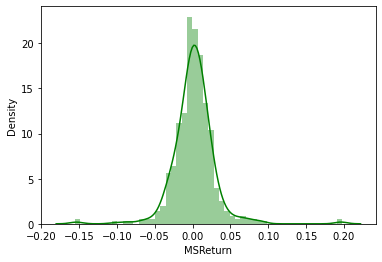

In [17]:
sns.distplot(returns.loc['2020-01-01':'2022-01-01']['MSReturn'],color='green')

<AxesSubplot:xlabel='Date'>

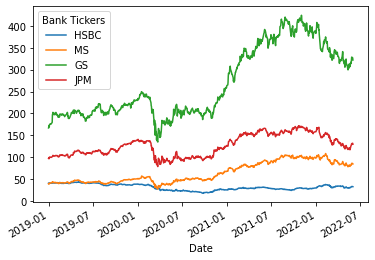

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [36]:
#Iplot
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

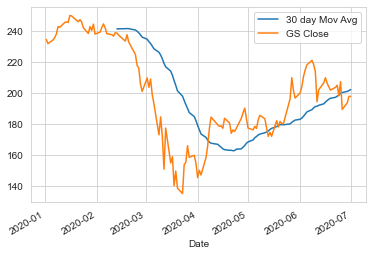

In [39]:
#Moving averages 
import matplotlib.pyplot as plt
GS['Close'].loc['2020-01-01':'2020-07-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
GS['Close'].loc['2020-01-01':'2020-07-01'].plot(label='GS Close')
plt.legend()

<AxesSubplot:xlabel='Bank Tickers', ylabel='Bank Tickers'>

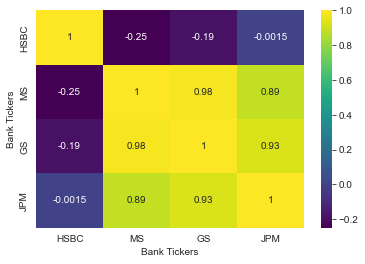

In [45]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='viridis')

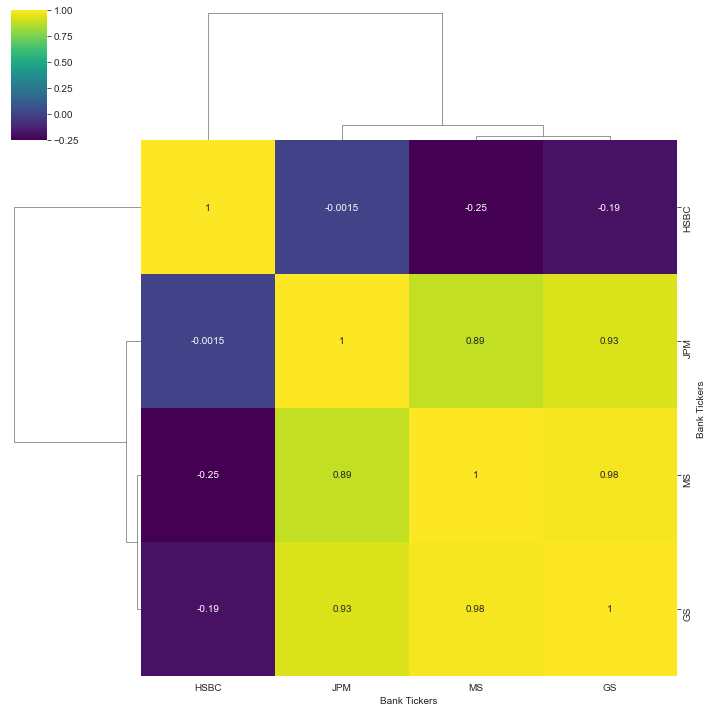

In [46]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='viridis')

In [51]:
gs15 = GS[['Open','High','Low','Close']].loc['2020-01-01':'2020-07-01']
gs15.iplot(kind='candle')

In [52]:
GS['Close'].loc['2020-01-01':'2020-07-01'].ta_plot(study='sma',periods=[13,21,55])


In [53]:
GS['Close'].loc['2020-01-01':'2020-07-01'].ta_plot(study='boll')